In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

### Read raw data

In [2]:
data=pd.read_csv('Dataset_SW.csv')
data.set_index('id',inplace=True) 

In [3]:
data

,productOf,hasRAM,displaySizeOf,hasBatteryCapacity
id,,,,
1000,SAMSUNG-Galaxy,2-GB,5-inch,4000mAh
1005,SAMSUNG-Galaxy,3-GB,5.5-inch,3500mAh
1006,Mi-A2,2-GB,5.2-inch,5000mAh
1017,SAMSUNG-Galaxy-A9-Pro,4-GB,6-inch,5000mAh
1027,Mi-A2,4-GB,5.1-inch,5000mAh
1029,SAMSUNG-Galaxy-S7,4-GB,5.1-inch,6000mAh
1023,Apple-iphone6,4-GB,6-inch,3500mAh
1033,Apple-iPhone7,3-GB,5-inch,4000mAh
1040,Poco-F7,6-GB,6-inch,4000mAh


### Convert raw data into RDF triples

In [8]:
rdf_data=[]
strs=''
for i,j in data.iterrows():
    for k in data.columns:
        strs=str(i)+" "+k+ " "+data.loc[i,k]
        rdf_data.append(strs)

In [9]:
rdf_data

['1000 productOf SAMSUNG-Galaxy',
 '1000 hasRAM 2-GB',
 '1000 displaySizeOf 5-inch',
 '1000 hasBatteryCapacity 4000mAh',
 '1005 productOf SAMSUNG-Galaxy',
 '1005 hasRAM 3-GB',
 '1005 displaySizeOf 5.5-inch',
 '1005 hasBatteryCapacity 3500mAh',
 '1006 productOf Mi-A2',
 '1006 hasRAM 2-GB',
 '1006 displaySizeOf 5.2-inch',
 '1006 hasBatteryCapacity 5000mAh',
 '1017 productOf SAMSUNG-Galaxy-A9-Pro',
 '1017 hasRAM 4-GB',
 '1017 displaySizeOf 6-inch',
 '1017 hasBatteryCapacity 5000mAh',
 '1027 productOf Mi-A2',
 '1027 hasRAM 4-GB',
 '1027 displaySizeOf 5.1-inch',
 '1027 hasBatteryCapacity 5000mAh',
 '1029 productOf SAMSUNG-Galaxy-S7',
 '1029 hasRAM 4-GB',
 '1029 displaySizeOf 5.1-inch',
 '1029 hasBatteryCapacity 6000mAh',
 '1023 productOf Apple-iphone6',
 '1023 hasRAM 4-GB',
 '1023 displaySizeOf 6-inch',
 '1023 hasBatteryCapacity 3500mAh',
 '1033 productOf Apple-iPhone7',
 '1033 hasRAM 3-GB',
 '1033 displaySizeOf 5-inch',
 '1033 hasBatteryCapacity 4000mAh',
 '1040 productOf Poco-F7',
 '1040 

### Extract subject, object and predicates from RDF triples

In [10]:
subject=[]
predicate=[]
objects=[]
for i in rdf_data:
    subject.append(i.split(' ')[0])
    predicate.append(i.split(' ')[1])
    objects.append(i.split(' ')[2])



In [11]:
total_nodes=subject+objects
unique_nodes=list(set(total_nodes))
unique_nodes

['1033',
 '5000mAh',
 '1015',
 '1029',
 '1000',
 'Poco-F7',
 '3-GB',
 '5.1-inch',
 '1006',
 'Mi-A2',
 '4-GB',
 '5.2-inch',
 '6000mAh',
 '6-GB',
 '1023',
 'Apple-iPhone7',
 '5-inch',
 '1027',
 'SAMSUNG-Galaxy-S7',
 '4000mAh',
 'SAMSUNG-Galaxy',
 '1005',
 'SAMSUNG-Galaxy-A9-Pro',
 '2-GB',
 '5.5-inch',
 '1040',
 '1017',
 '3500mAh',
 'Apple-iphone6',
 '6-inch']

In [12]:
for i,j,k in zip(subject, predicate,objects):
    print("Subject= "+i+ "\t"+"Predicate= "+j+"\t\t"+"Object= "+k)

Subject= 1000	Predicate= productOf		Object= SAMSUNG-Galaxy
Subject= 1000	Predicate= hasRAM		Object= 2-GB
Subject= 1000	Predicate= displaySizeOf		Object= 5-inch
Subject= 1000	Predicate= hasBatteryCapacity		Object= 4000mAh
Subject= 1005	Predicate= productOf		Object= SAMSUNG-Galaxy
Subject= 1005	Predicate= hasRAM		Object= 3-GB
Subject= 1005	Predicate= displaySizeOf		Object= 5.5-inch
Subject= 1005	Predicate= hasBatteryCapacity		Object= 3500mAh
Subject= 1006	Predicate= productOf		Object= Mi-A2
Subject= 1006	Predicate= hasRAM		Object= 2-GB
Subject= 1006	Predicate= displaySizeOf		Object= 5.2-inch
Subject= 1006	Predicate= hasBatteryCapacity		Object= 5000mAh
Subject= 1017	Predicate= productOf		Object= SAMSUNG-Galaxy-A9-Pro
Subject= 1017	Predicate= hasRAM		Object= 4-GB
Subject= 1017	Predicate= displaySizeOf		Object= 6-inch
Subject= 1017	Predicate= hasBatteryCapacity		Object= 5000mAh
Subject= 1027	Predicate= productOf		Object= Mi-A2
Subject= 1027	Predicate= hasRAM		Object= 4-GB
Subject= 1027	Pred

### Plot Linked Open Data cloud for the generated triples

{('1033', 'Apple-iPhone7'): 'productOf', ('1033', '3-GB'): 'hasRAM', ('1033', '5-inch'): 'displaySizeOf', ('1033', '4000mAh'): 'hasBatteryCapacity', ('1015', 'Poco-F7'): 'productOf', ('1015', '6-GB'): 'hasRAM', ('1015', '5-inch'): 'displaySizeOf', ('1015', '3500mAh'): 'hasBatteryCapacity', ('1029', 'SAMSUNG-Galaxy-S7'): 'productOf', ('1029', '4-GB'): 'hasRAM', ('1029', '5.1-inch'): 'displaySizeOf', ('1029', '6000mAh'): 'hasBatteryCapacity', ('1000', 'SAMSUNG-Galaxy'): 'productOf', ('1000', '2-GB'): 'hasRAM', ('1000', '5-inch'): 'displaySizeOf', ('1000', '4000mAh'): 'hasBatteryCapacity', ('1006', 'Mi-A2'): 'productOf', ('1006', '2-GB'): 'hasRAM', ('1006', '5.2-inch'): 'displaySizeOf', ('1006', '5000mAh'): 'hasBatteryCapacity', ('1023', 'Apple-iphone6'): 'productOf', ('1023', '4-GB'): 'hasRAM', ('1023', '6-inch'): 'displaySizeOf', ('1023', '3500mAh'): 'hasBatteryCapacity', ('1027', 'Mi-A2'): 'productOf', ('1027', '4-GB'): 'hasRAM', ('1027', '5.1-inch'): 'displaySizeOf', ('1027', '5000mAh

C:\Users\Shefi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Shefi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


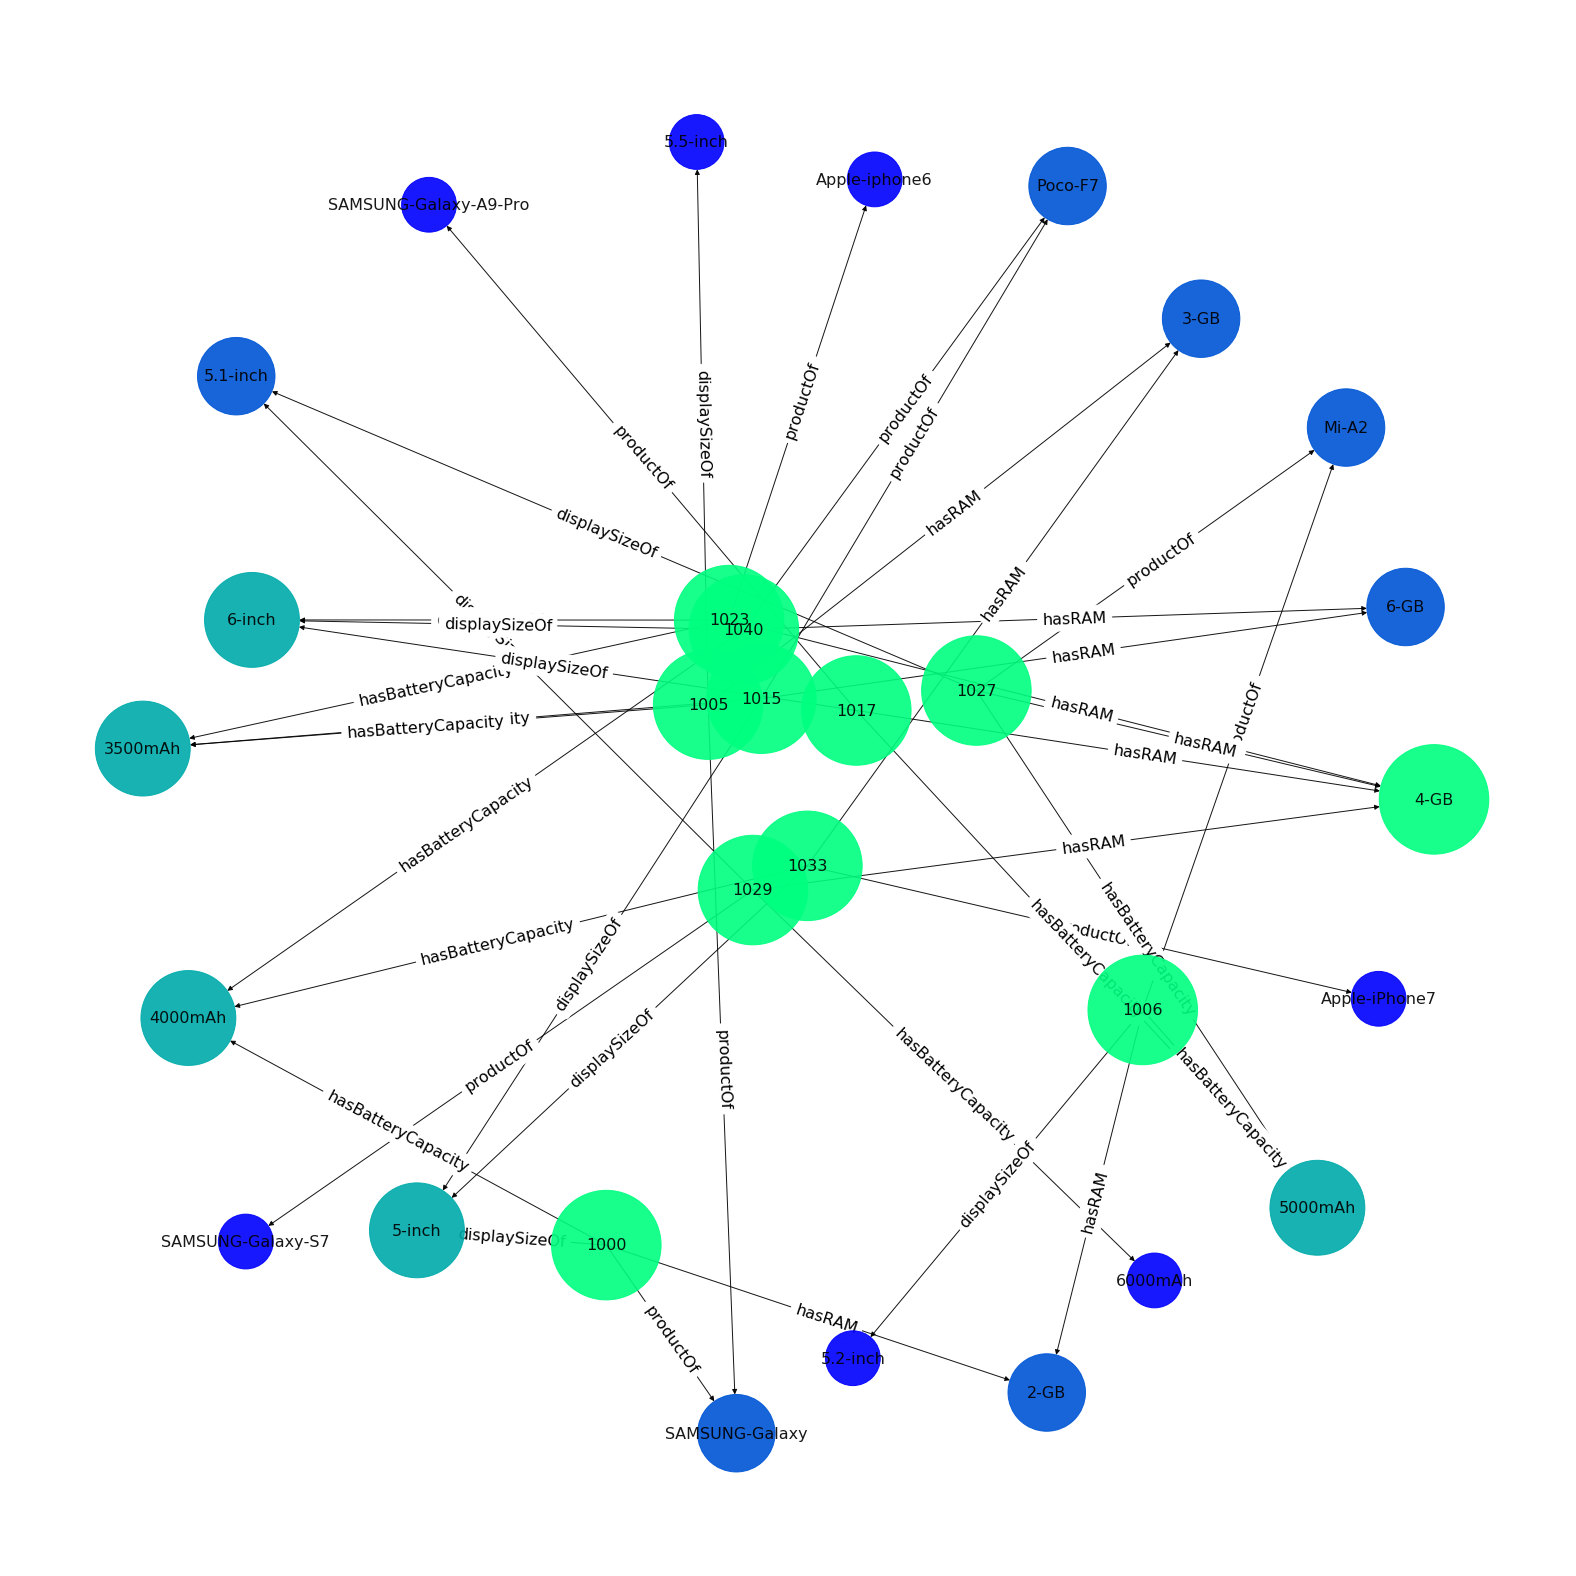

In [13]:
import networkx as nx
edges=[]
plt.figure(figsize =(22, 22)) 
G=nx.DiGraph()
pos = nx.spring_layout(G,k=0.20)
for i in unique_nodes:
    G.add_node(i)

for (i,j,k) in zip(subject,objects,predicate): 
    edges.append((i,j))
    G.add_edge(i, j, weight=2, title=k,length = 100)

edge_labels = nx.get_edge_attributes(G, 'title')
print(edge_labels)
node_color = [G.degree(v) for v in G] 
node_size=[G.degree(v)*3000 for v in G] 
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos,edge_color='black',width=1,linewidths=1, 
                 with_labels=True,node_size=node_size,node_color=node_color,
                 alpha=0.9,cmap = plt.cm.winter,font_size=16)

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,font_size=16)
plt.axis('off')
plt.savefig('sw.png')
plt.tight_layout();
plt.show()
